In [14]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from matplotlib.font_manager import font_scalings

In [2]:
df = pd.read_csv("Gaming_Hours_vs_Performance_1000_Rows.csv")
print(df.head().T)

                                           0        1         2  \
User_ID                                U0001    U0002     U0003   
Age                                       21       35        26   
Gender                                  Male   Female      Male   
Occupation              Working Professional  Student   Student   
Game_Type                             Action   Sports    Puzzle   
Daily_Gaming_Hours                       4.0      1.0       2.0   
Weekly_Gaming_Hours                     28.0      7.0      14.0   
Primary_Gaming_Time                  Morning    Night   Morning   
Sleep_Hours                              4.6      5.4       8.0   
Stress_Level                               6        2         4   
Focus_Level                                4        7         8   
Academic_or_Work_Score                    69       67        82   
Productivity_Level                        66       72        82   
Performance_Impact                  Negative  Neutral  Positiv

<Axes: xlabel='Academic_or_Work_Score', ylabel='Count'>

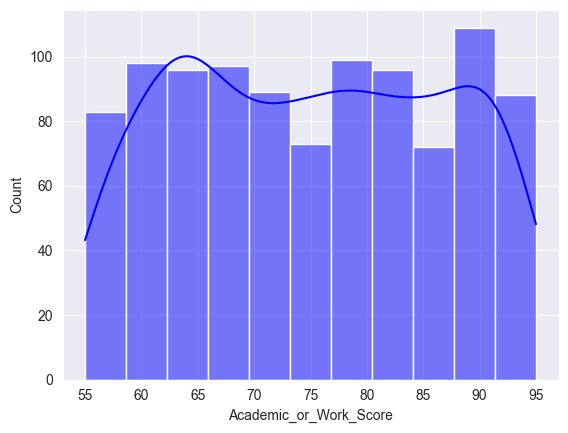

In [5]:
sn.histplot(df['Academic_or_Work_Score'], color='blue', kde=True, )

### Faza 3

Wstępna analiza danych

In [6]:
df.describe()

,Age,Daily_Gaming_Hours,Weekly_Gaming_Hours,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,26.600000,3.320300,23.242100,6.479500,5.454000,6.065000,75.07800,75.275000
std,5.207218,1.613059,11.291414,1.155848,2.281905,2.010178,11.67494,12.058805
min,18.000000,0.500000,3.500000,4.500000,2.000000,3.000000,55.00000,50.000000
25%,22.000000,2.000000,14.000000,5.475000,3.000000,4.000000,65.00000,65.000000
50%,27.000000,3.300000,23.100000,6.500000,5.000000,6.000000,75.00000,75.000000
75%,31.000000,4.800000,33.600000,7.500000,7.000000,8.000000,85.00000,86.000000
max,35.000000,6.000000,42.000000,8.500000,9.000000,9.000000,95.00000,100.000000


#### Plots

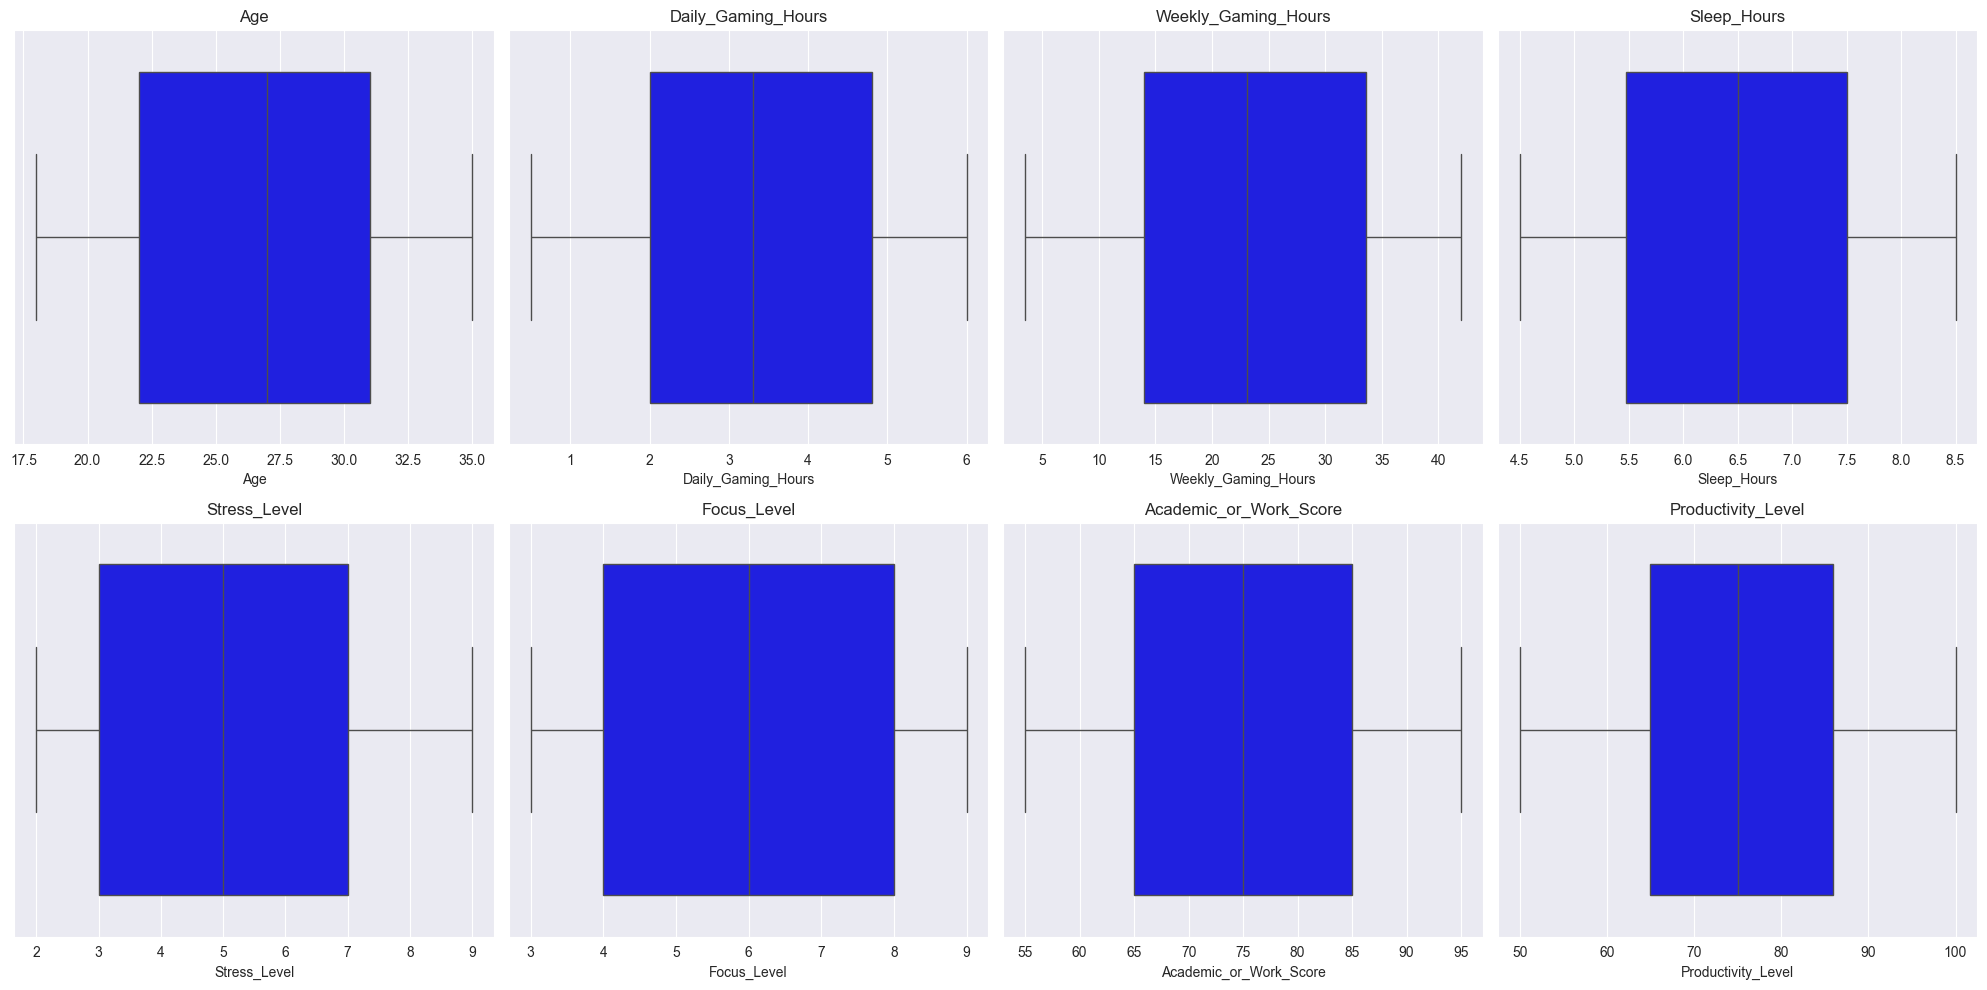

In [18]:
number_cols = df.select_dtypes(include=['number'])
# for col in number_cols:
#     sn.boxplot(df[col],color='red', showfliers=False)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
#splaszczeenie axes -> lista 8 elementow
axes = axes.flatten()

for i,col in enumerate(number_cols):
    sn.boxplot(x=df[col], color='blue', ax=axes[i], showfliers=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

##### brak wartosci odstajacych

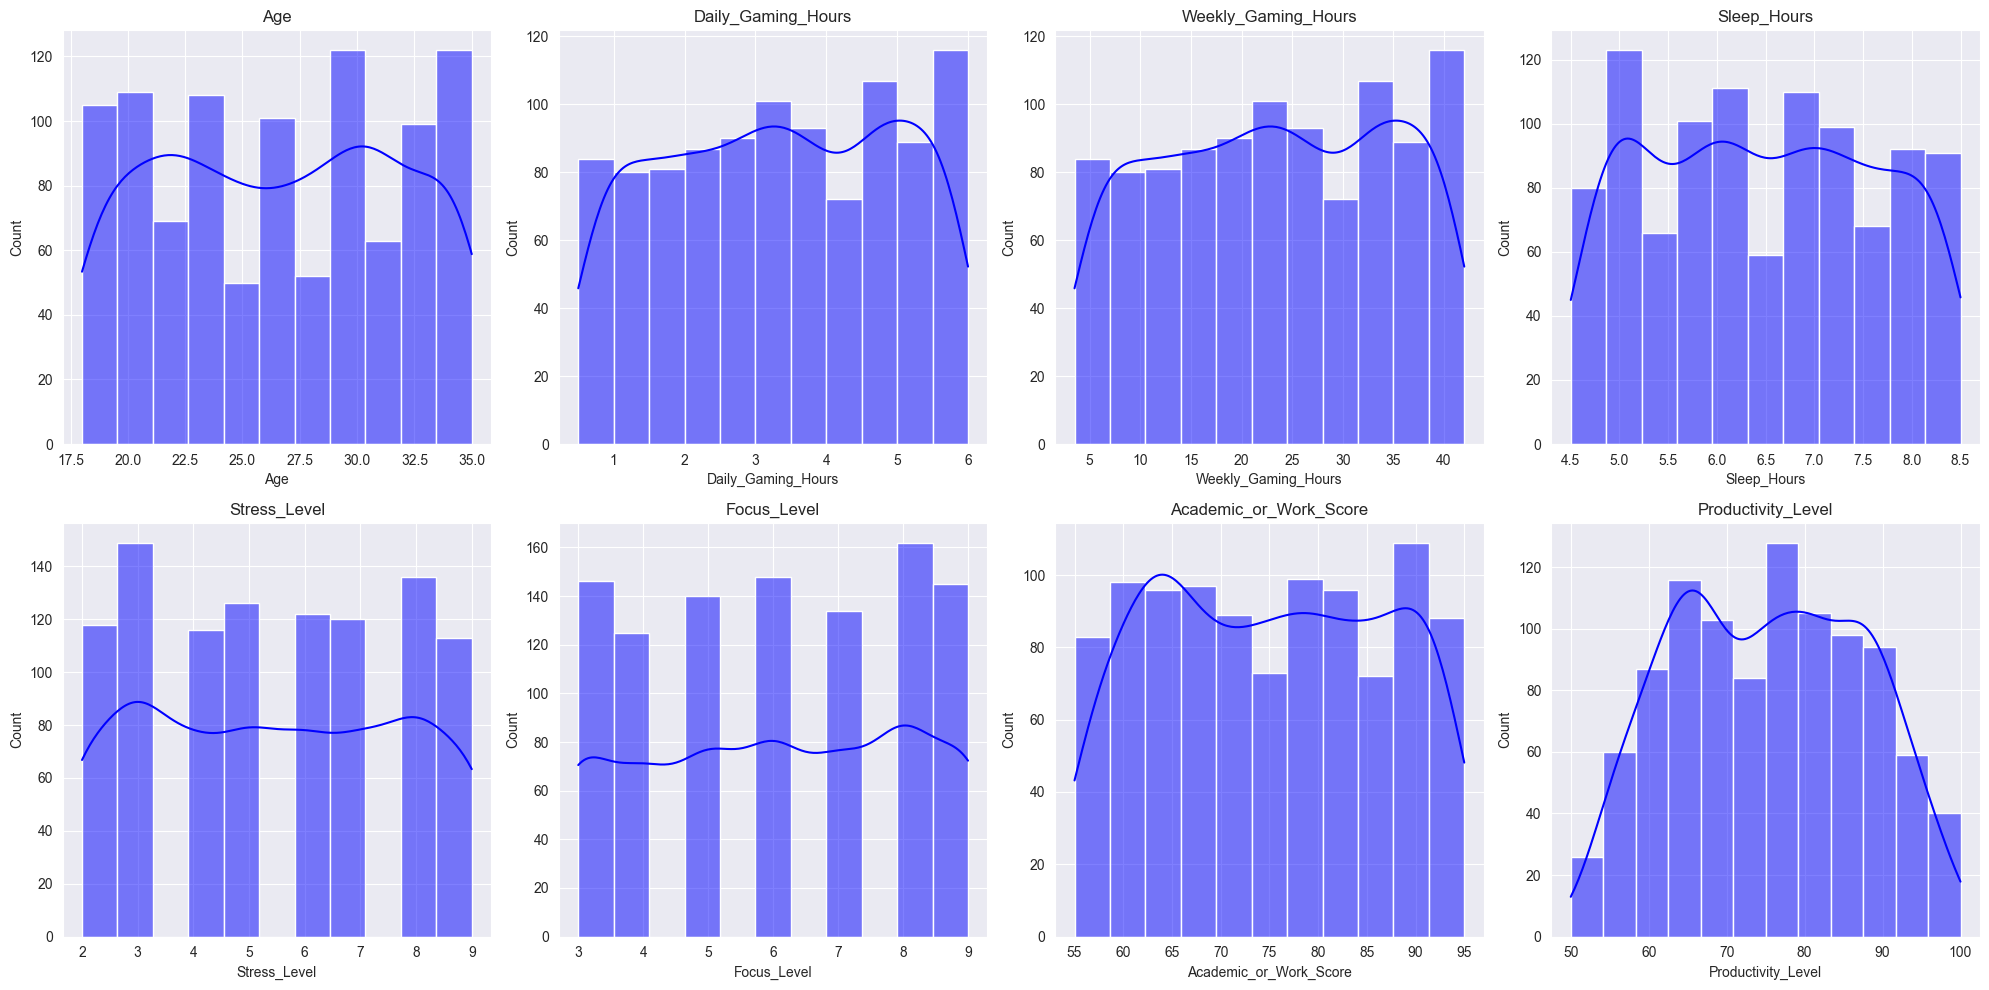

In [28]:
fig, axes = plt.subplots(2,4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(number_cols):
    sn.histplot(df[col], color='blue', ax=axes[i], kde=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()



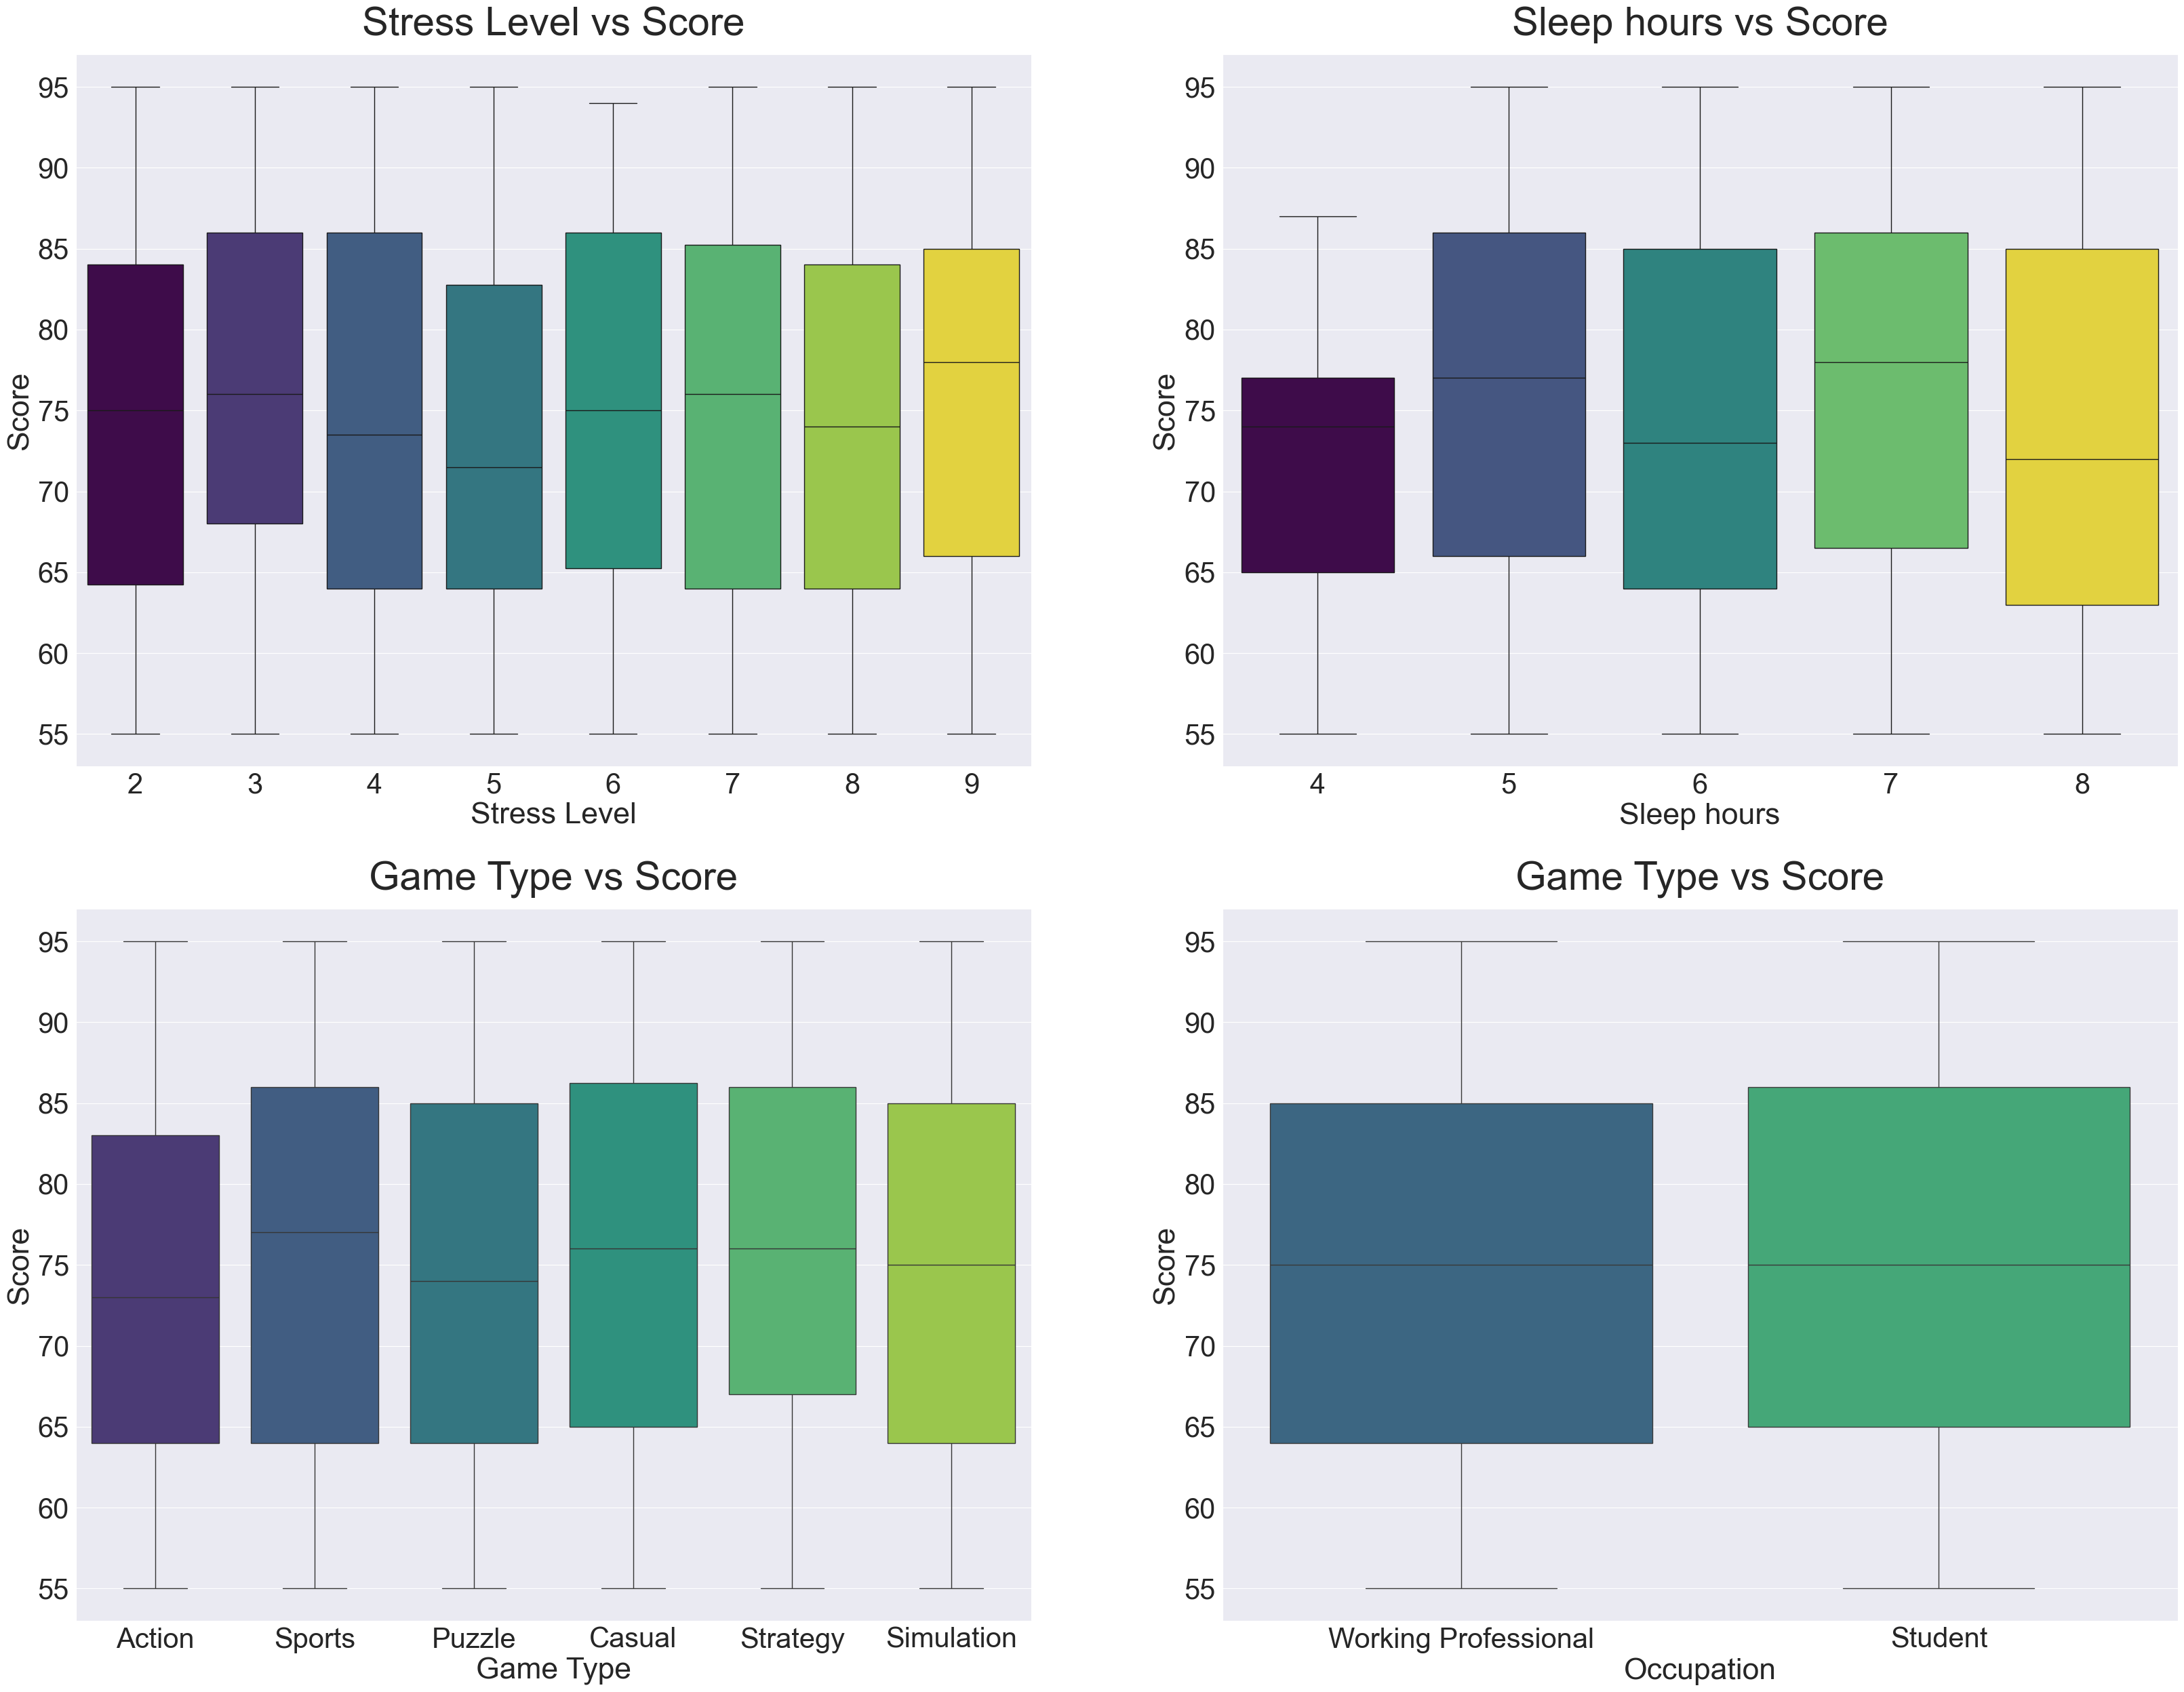

In [59]:
fig, axes = plt.subplots(2,2, figsize=(40,30))
axes = axes.flatten()
sn.set_context(font_scale=1.5)

### stres vs score

sn.boxplot(data=df, x='Stress_Level', y='Academic_or_Work_Score', ax=axes[0], palette='viridis', hue='Stress_Level', legend=False)
axes[0].set_title("Stress Level vs Score", fontsize=42, pad=20)
axes[0].set_ylabel("Score", fontsize=32)
axes[0].set_xlabel("Stress Level", fontsize=32)
axes[0].tick_params(axis='both', which='major', labelsize=30)

##### sleep vs score

df['Sleep_Hours_Rounded'] = df['Sleep_Hours'].round().astype(int)
sn.boxplot(data=df, x='Sleep_Hours_Rounded', y='Academic_or_Work_Score', ax=axes[1], palette='viridis', hue='Sleep_Hours_Rounded', legend=False)
axes[1].set_title("Sleep hours vs Score", fontsize=42, pad=20)
axes[1].set_ylabel("Score", fontsize=32)
axes[1].set_xlabel("Sleep hours", fontsize=32)
axes[1].tick_params(axis='both', which='major', labelsize=30)

##### game type vs score

sn.boxplot(data=df, x='Game_Type', y='Academic_or_Work_Score', ax=axes[2], palette='viridis', hue='Game_Type', legend=False)
axes[2].set_title("Game Type vs Score", fontsize=42, pad=20)
axes[2].set_ylabel("Score", fontsize=32)
axes[2].set_xlabel("Game Type", fontsize=32)
axes[2].tick_params(axis='both', which='major', labelsize=30)


##### who vs score

sn.boxplot(data=df, x='Occupation', y='Academic_or_Work_Score', ax=axes[3], palette='viridis', hue='Occupation', legend=False)
axes[3].set_title("Game Type vs Score", fontsize=42, pad=20)
axes[3].set_ylabel("Score", fontsize=32)
axes[3].set_xlabel("Occupation", fontsize=32)
axes[3].tick_params(axis='both', which='major', labelsize=30)


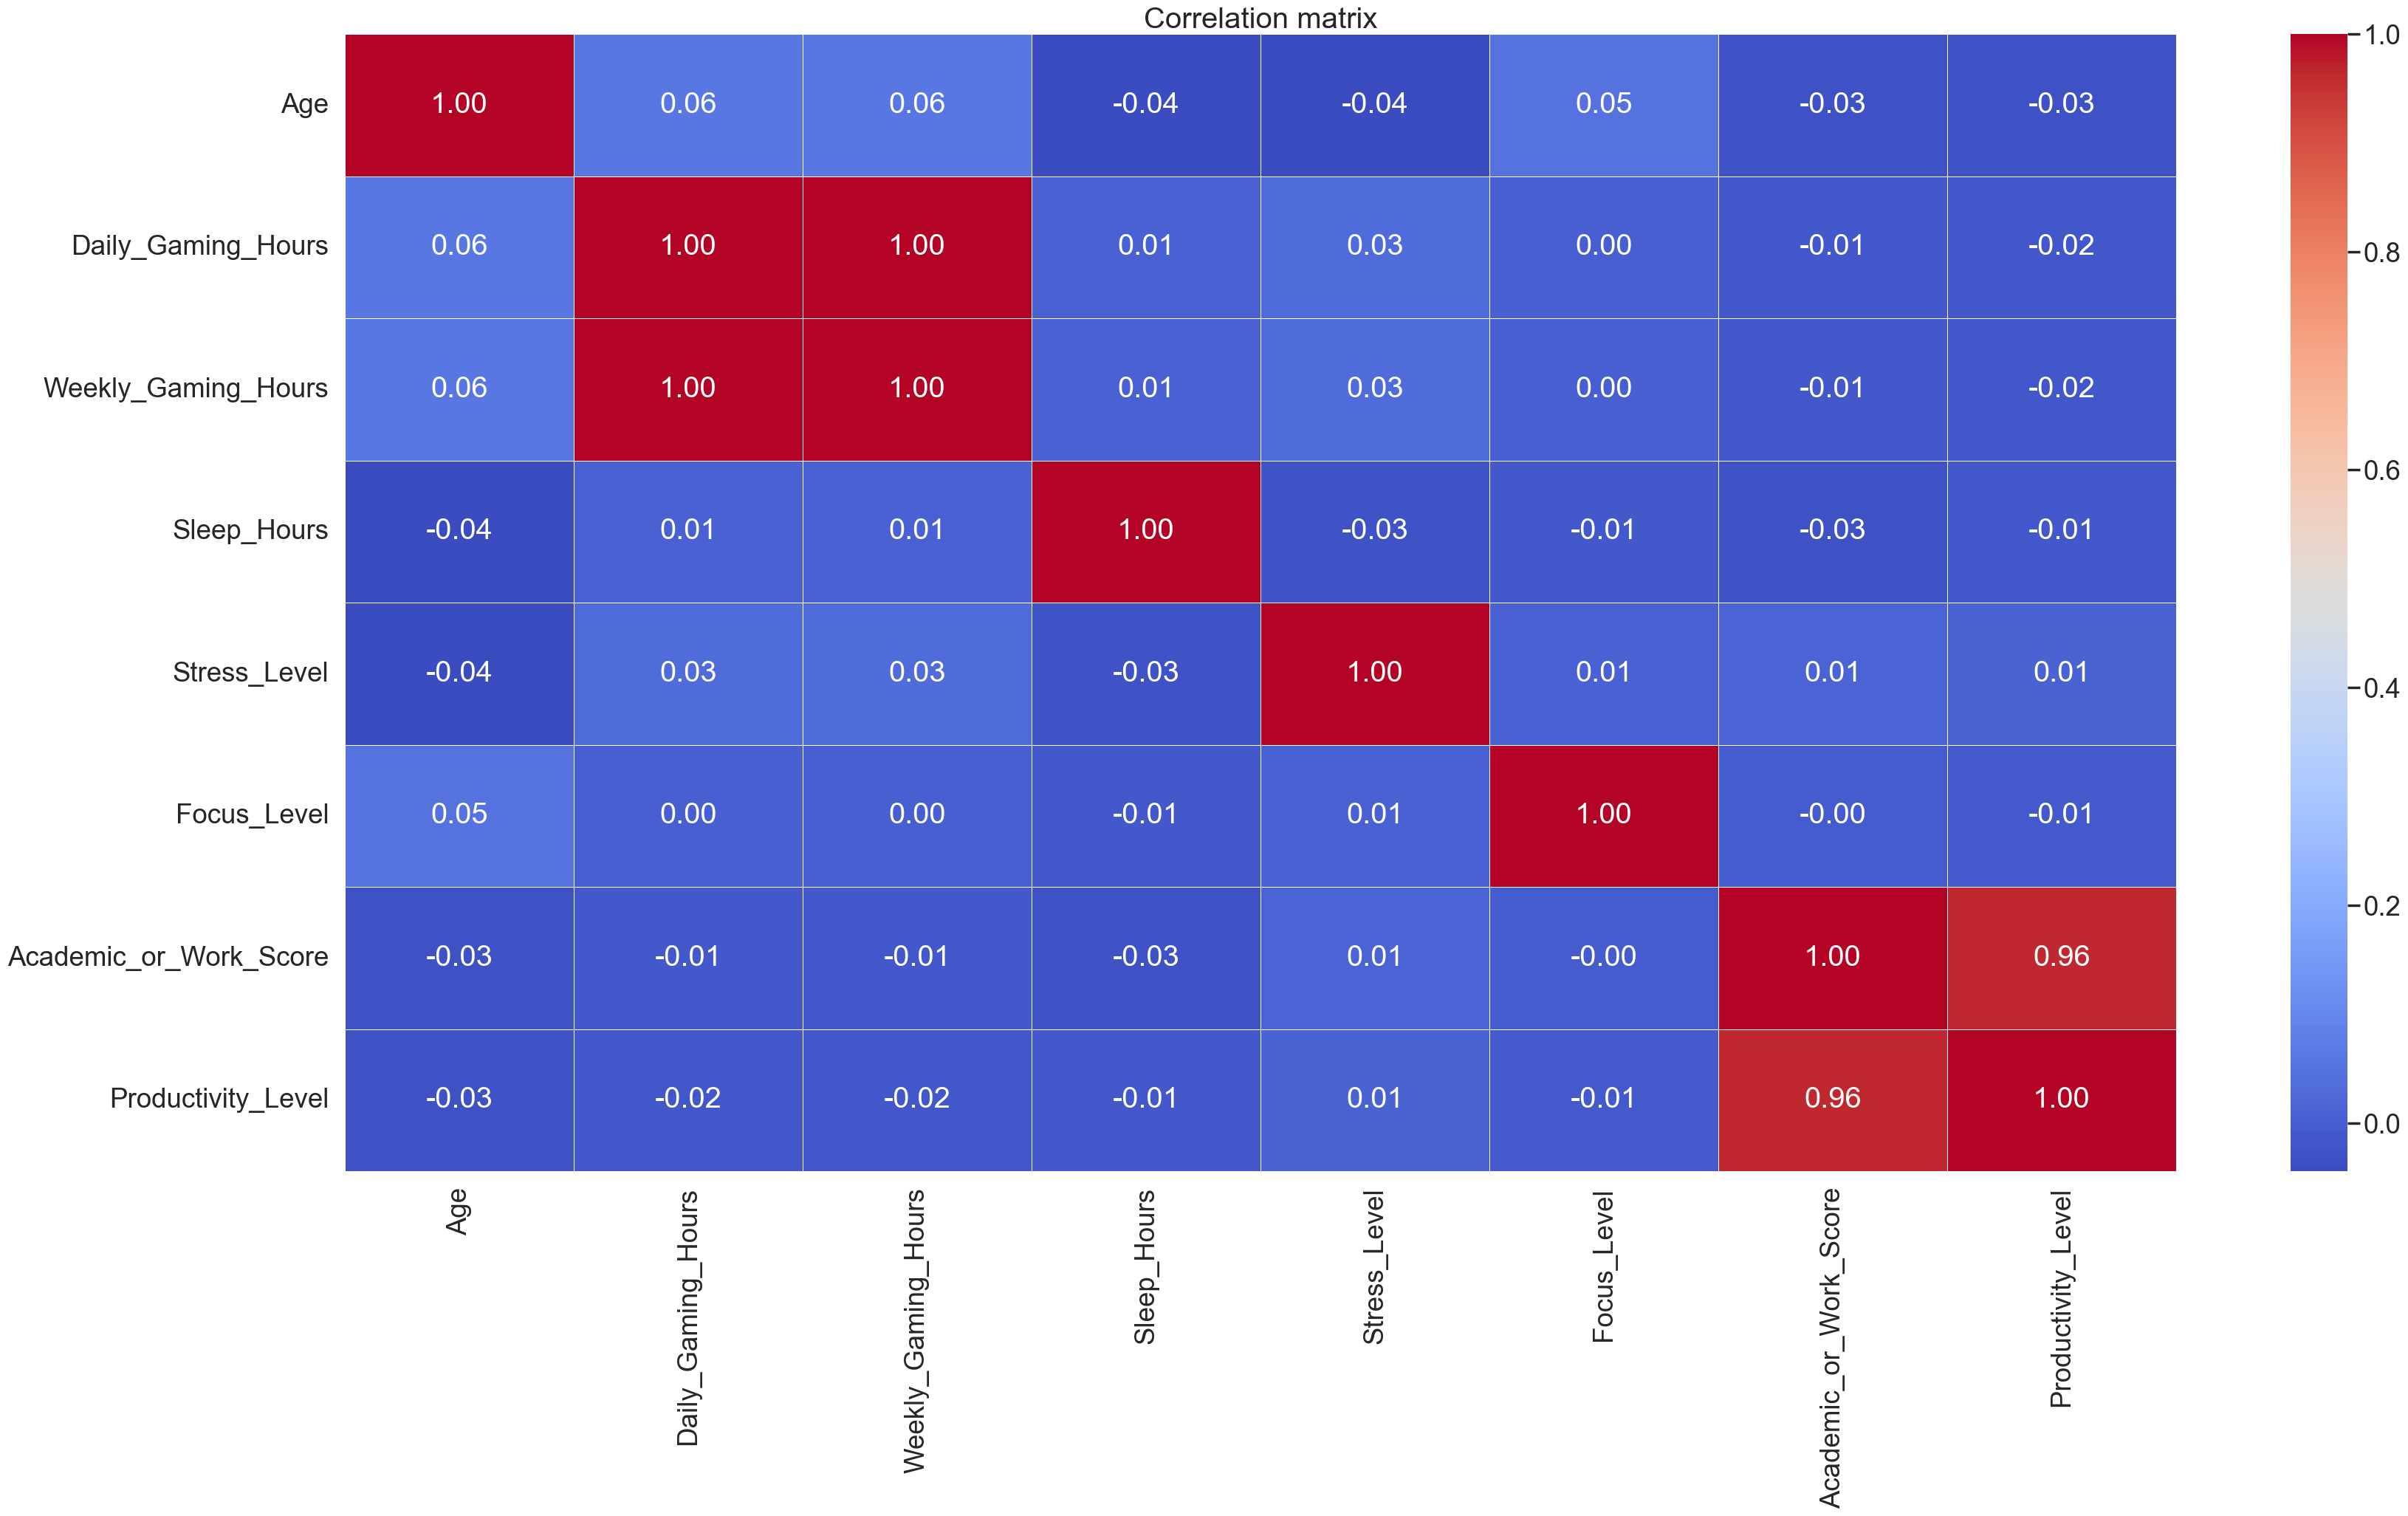

In [67]:
corr_matrix = number_cols.corr()
sn.set_context("poster", font_scale=1.2)

sn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

### Obserwacje
- Productivity level jest wysoko skorelowana z Scorem - trzeba sie tego pozbyc
- Daily_Gaming_Hours i Weekly_Gaming_Hours jest tym samym pomnożonym przez 7 dlatego zrezygnuje z weekly_gaming_hours
- Performance_Impact jest zmienną która została dodana po poznaniu Score, musze usunac zmienna anachroniczna
- user_id jest zbedne musze to usunac
